Koonj Shah

Student ID - 8840641

# Frame the problem

The diabetes dataset contains various attributes such as age, sex, body mass index, blood pressure, and six blood serum measurements. The target variable is a quantitative measure of disease progression after one year. 
This problem can be considered as a regression task since the target variable (disease progression) is a continuous value that needs to be predicted.The performance of the model can be evaluated using regression metrics such as mean squared error (MSE), root mean squared error (RMSE), or mean absolute error (MAE). These metrics quantify the difference between the predicted and actual disease progression values.

# Get The Data

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn  import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error


# Load Diabetes Datasetes
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Study each attribute and its characteristics
print("Attributes:")
print(diabetes_X)
print("Target Attribute:")
print(diabetes_y)


Attributes:
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
Target Attribute:
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  

# Explore the data 

In [24]:
# Study the dependant variable 
print("Target Attribute:")
print(diabetes_y)
print()

# Get the shape of data
diabetes_X.shape

def calculate_statistics(data):
    statistics = {
        'mean': np.mean(data, axis=0),
        'std': np.std(data, axis=0),
        'min': np.min(data, axis=0),
        'max': np.max(data, axis=0)
    }
    return statistics

# Calculate statistics for diabetes_X
x_statistics = calculate_statistics(diabetes_X)
#print(x_statistics)
# Calculate statistics for diabetes_y
y_statistics = calculate_statistics(diabetes_y)

Target Attribute:
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116

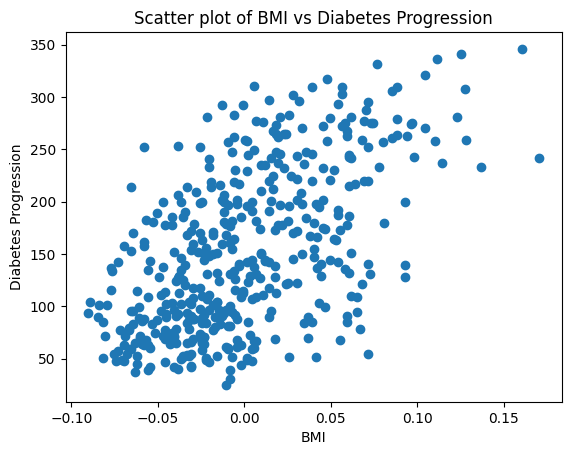

In [25]:
# Create a scatter plot of a specific attribute against the target variable

plt.scatter(diabetes_X[:, 2], diabetes_y)
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.title("Scatter plot of BMI vs Diabetes Progression")
plt.show()

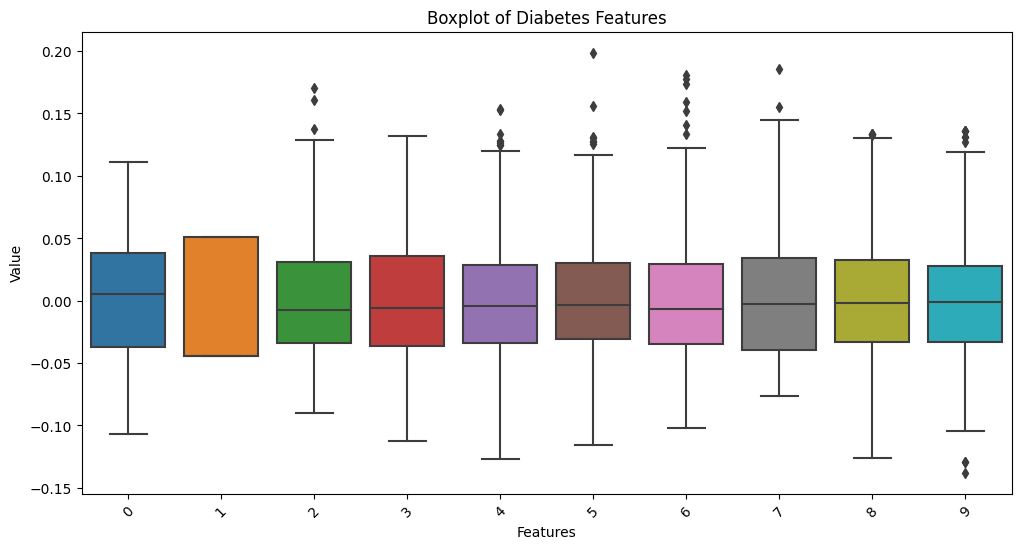

In [20]:
# Create boxplots for each attribute in diabetes_X

plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_X)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Boxplot of Diabetes Features")
plt.show()

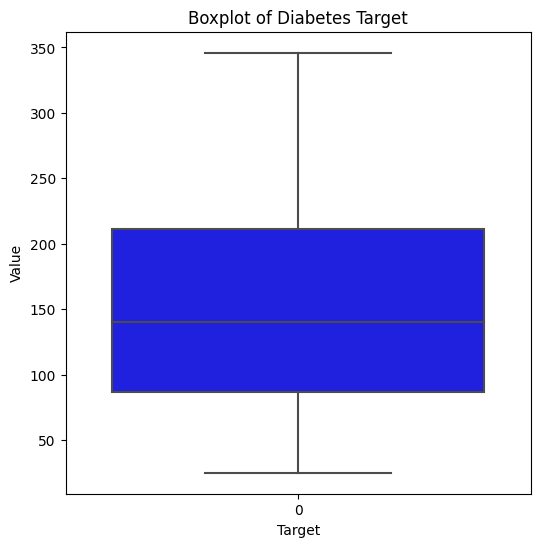

In [23]:
# Create a boxplot for the target variable diabetes_y

plt.figure (figsize=(6, 6))
sns.boxplot(data=diabetes_y.reshape(-1, 1),color= "blue")
plt.xlabel("Target")
plt.ylabel("Value")
plt.title("Boxplot of Diabetes Target")
plt.show()

# Study attribute

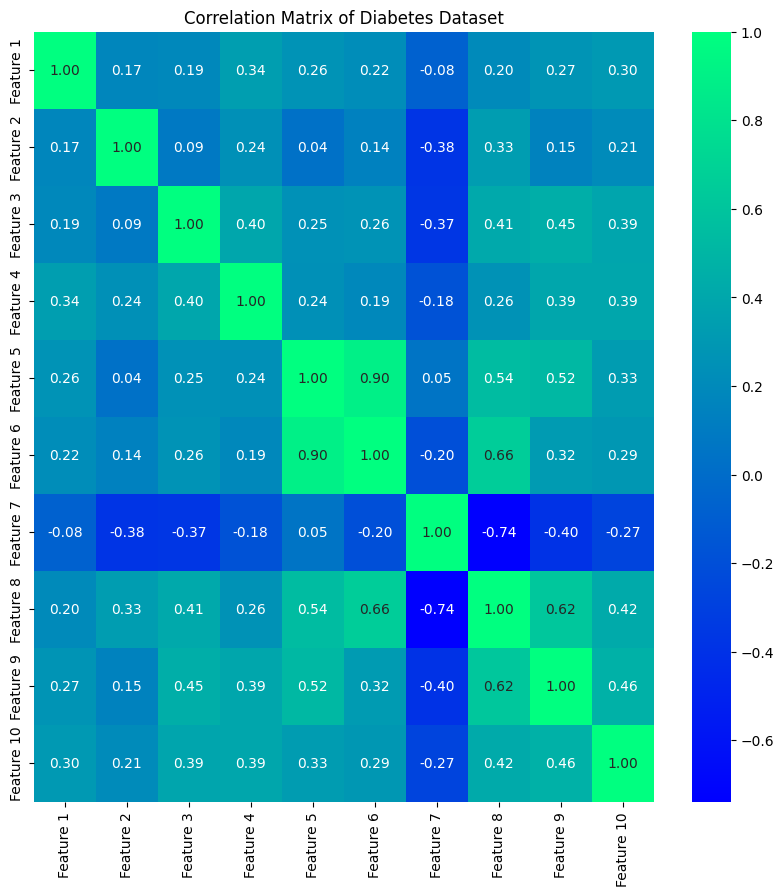

In [27]:
correlation_matrix = np.corrcoef(diabetes_X, rowvar=False)
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='winter', fmt=".2f",
            xticklabels=["Feature {}".format(i+1) for i in range(diabetes_X.shape[1])],
            yticklabels=["Feature {}".format(i+1) for i in range(diabetes_X.shape[1])])
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

# Modeling


Graph: BMI vs Disease Progression

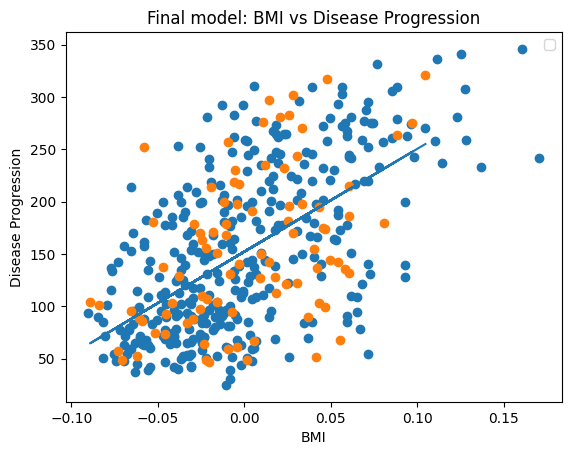

In [29]:
plt.title("Final model: BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend(["Training Data", "Testing Data", "Predicated Slope"])
plt.scatter(X_train, y_train, label="Training Data")
plt.scatter(X_test, y_test, label="Testing Data")
plt.plot(X_test, y_pred, label="Predicated Slope")
plt.show()

# Loss of train data

In [30]:
y_train_pred = model.predict(X_train)
print(mean_squared_error(y_train, y_train_pred))

3827.8186984113813


# Loss of test Data

In [31]:
y_train_pred = model.predict(X_train)
print(mean_squared_error(y_train, y_train_pred))

3827.8186984113813
